# How to Get Better Deep Learning Results (7-Day Mini-Course)

Configuring neural network models is often referred to as a “*dark art*.”

This is because there are no hard and fast rules for configuring a network for a given problem. We cannot analytically calculate the optimal model type or model configuration for a given dataset.

Fortunately, there are techniques that are known to address specific issues when configuring and training a neural network that are available in modern deep learning libraries such as Keras.

In this crash course, you will discover how you can confidently get better performance from your deep learning models

## Crash-Course Overview

This crash course is broken down into seven lessons.

You could complete one lesson per day (recommended) or complete all of the lessons in one day (hardcore). It really depends on the time you have available and your level of enthusiasm.

Below are seven lessons that will allow you to confidently improve the performance of your deep learning model:

- **Lesson 01**: Better Deep Learning Framework
- **Lesson 02**: Batch Size
- **Lesson 03**: Learning Rate Schedule
- **Lesson 04**: Batch Normalization
- **Lesson 05**: Weight Regularization
- **Lesson 06**: Adding Noise
- **Lesson 07**: Early Stopping

## Lesson 01: Better Deep Learning Framework

In this lesson, you will discover a framework that you can use to systematically improve the performance of your deep learning model.

Modern deep learning libraries such as Keras allow you to define and start fitting a wide range of neural network models in minutes with just a few lines of code.

Nevertheless, it is still challenging to configure a neural network to get good performance on a new predictive modeling problem.

There are three types of problems that are straightforward to diagnose with regard to the poor performance of a deep learning neural network model; they are:

- **Problems with Learning**. Problems with learning manifest in a model that cannot effectively learn a training dataset or shows slow progress or bad performance when learning the training dataset.
- **Problems with Generalization**. Problems with generalization manifest in a model that overfits the training dataset and makes poor performance on a holdout dataset.
- **Problems with Predictions**. Problems with predictions manifest as the stochastic training algorithm having a strong influence on the final model, causing a high variance in behavior and performance.

The sequential relationship between the three areas in the proposed breakdown allows the issue of deep learning model performance to be first isolated, then targeted with a specific technique or methodology.

We can summarize techniques that assist with each of these problems as follows:

- **Better Learning**. Techniques that improve or accelerate the adaptation of neural network model weights in response to a training dataset.
- **Better Generalization**. Techniques that improve the performance of a neural network model on a holdout dataset.
- **Better Predictions**. Techniques that reduce the variance in the performance of a final model.

You can use this framework to first diagnose the type of problem that you have and then identify a technique to evaluate to attempt to address your problem.

## Lesson 02: Batch Size

In this lesson, you will discover the importance of the batch size when training neural networks.

Neural networks are trained using gradient descent where the estimate of the error used to update the weights is calculated based on a subset of the training dataset.

The number of examples from the training dataset used in the estimate of the error gradient is called the batch size and is an important hyperparameter that influences the dynamics of the learning algorithm.

The choice of batch size controls how quickly the algorithm learns, for example:

- **Batch Gradient Descent**. Batch size is set to the number of examples in the training dataset, more accurate estimate of error but longer time between weight updates.
- **Stochastic Gradient Descent**. Batch size is set to 1, noisy estimate of error but frequent updates to weights.
- **Minibatch Gradient Descent**. Batch size is set to a value more than 1 and less than the number of training examples, trade-off between batch and stochastic gradient descent.

Keras allows you to configure the batch size via the *batch_size* argument to the *fit()* function, for example:

In [ ]:
# fit model
history = model.fit(trainX, trainy, epochs=1000, batch_size=len(trainX))

The example below demonstrates a Multilayer Perceptron with batch gradient descent on a binary classification problem.

### Run different batch size (batch, minibatch, and stochastic)

In [ ]:
# Batch Gradient descent
batch_size = len(trainX)

Train: 0.830, Test: 0.818


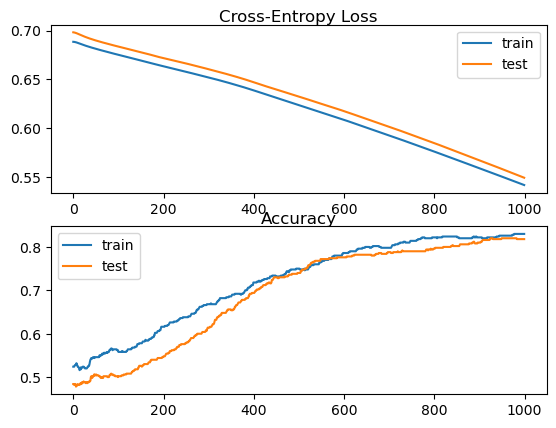

In [2]:
from sklearn.datasets import make_circles
from keras.layers import Dense, Input
from keras.models import Sequential
from keras.optimizers import SGD
from matplotlib import pyplot as plt

# generate dataset
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)

# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

# define model
model = Sequential()
model.add(Input(shape=(2,)))  # preferred way to define input shape
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile model
opt = SGD(learning_rate=0.01, momentum=0.9)  # updated argument name
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy),
                    epochs=1000, batch_size=len(trainX), verbose=0)

# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot loss learning curves
plt.subplot(211)
plt.title('Cross-Entropy Loss', pad=-40)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

# plot accuracy learning curves
plt.subplot(212)
plt.title('Accuracy', pad=-40)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [ ]:
#Mini-batch gradient descent
batch_size = 32  # or try 64, 128 for experimentation

Train: 0.840, Test: 0.848


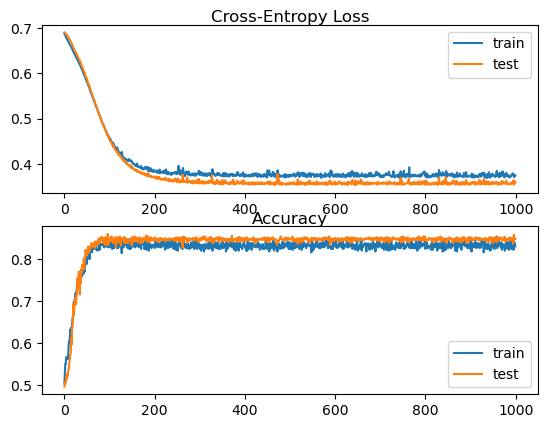

In [4]:
from sklearn.datasets import make_circles
from keras.layers import Dense, Input
from keras.models import Sequential
from keras.optimizers import SGD
from matplotlib import pyplot as plt

# generate dataset
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)

# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

# define model
model = Sequential()
model.add(Input(shape=(2,)))  # preferred way to define input shape
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile model
opt = SGD(learning_rate=0.01, momentum=0.9)  # updated argument name
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy),
                    epochs=1000, batch_size=32, verbose=0)

# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot loss learning curves
plt.subplot(211)
plt.title('Cross-Entropy Loss', pad=-40)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

# plot accuracy learning curves
plt.subplot(212)
plt.title('Accuracy', pad=-40)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [ ]:
# Stochastic gradient descent
batch_size = 1

Train: 0.830, Test: 0.836


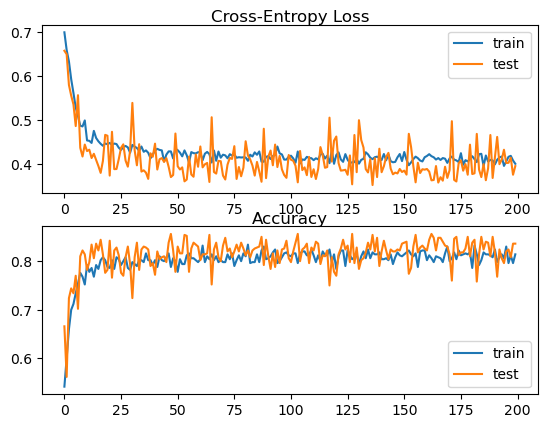

In [1]:
from sklearn.datasets import make_circles
from keras.layers import Dense, Input
from keras.models import Sequential
from keras.optimizers import SGD
from matplotlib import pyplot as plt

# generate dataset
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)

# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

# define model
model = Sequential()
model.add(Input(shape=(2,)))  # preferred way to define input shape
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile model
opt = SGD(learning_rate=0.01, momentum=0.9)  # updated argument name
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy),
                    epochs=200, batch_size=1, verbose=0)

# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot loss learning curves
plt.subplot(211)
plt.title('Cross-Entropy Loss', pad=-40)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

# plot accuracy learning curves
plt.subplot(212)
plt.title('Accuracy', pad=-40)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

## Lesson 03: Learning Rate Schedule

In this lesson, you will discover how to configure an adaptive learning rate schedule to fine tune the model during the training run.

The amount of change to the model during each step of this search process, or the step size, is called the “*learning rate*” and provides perhaps the most important hyperparameter to tune for your neural network in order to achieve good performance on your problem.

Configuring a fixed learning rate is very challenging and requires careful experimentation. An alternative to using a fixed learning rate is to instead vary the learning rate over the training process.

Keras provides the *ReduceLROnPlateau* learning rate schedule that will adjust the learning rate when a plateau in model performance is detected, e.g. no change for a given number of training epochs. For example:

In [ ]:
# define learning rate schedule
rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_delta=1E-7, verbose=1)

This callback is designed to reduce the learning rate after the model stops improving with the hope of fine-tuning model weights during training.

The example below demonstrates a Multilayer Perceptron with a learning rate schedule on a binary classification problem, where the learning rate will be reduced by an order of magnitude if no change is detected in validation loss over 5 training epochs.

### Run with and without learning rate schedule

In [ ]:
# With Learning Rate Schedule
rlrp = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=5,
    min_delta=1E-7,
    verbose=1
)

# Include the callback during training
history = model.fit(..., callbacks=[rlrp])


Epoch 183: ReduceLROnPlateau reducing learning rate to 0.0009999999776482583.

Epoch 190: ReduceLROnPlateau reducing learning rate to 9.999999310821295e-05.

Epoch 195: ReduceLROnPlateau reducing learning rate to 9.999999019782991e-06.

Epoch 200: ReduceLROnPlateau reducing learning rate to 9.99999883788405e-07.

Epoch 205: ReduceLROnPlateau reducing learning rate to 9.99999883788405e-08.

Epoch 210: ReduceLROnPlateau reducing learning rate to 9.999998695775504e-09.

Epoch 215: ReduceLROnPlateau reducing learning rate to 9.99999905104687e-10.

Epoch 220: ReduceLROnPlateau reducing learning rate to 9.999998606957661e-11.

Epoch 225: ReduceLROnPlateau reducing learning rate to 9.99999874573554e-12.

Epoch 230: ReduceLROnPlateau reducing learning rate to 9.999999092680235e-13.

Epoch 235: ReduceLROnPlateau reducing learning rate to 9.9999988758398e-14.

Epoch 240: ReduceLROnPlateau reducing learning rate to 9.999999146890344e-15.

Epoch 245: ReduceLROnPlateau reducing learning rate to 9.

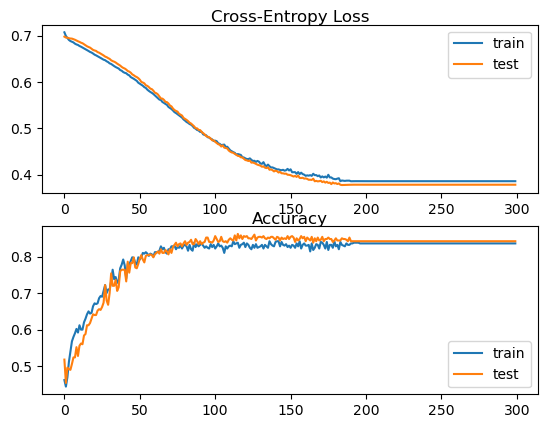

In [2]:
# example of a learning rate schedule
from sklearn.datasets import make_circles
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.callbacks import ReduceLROnPlateau
from matplotlib import pyplot
# generate dataset
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Input(shape=(2,)))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile model
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
# define learning rate schedule
rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_delta=1E-7, verbose=1)
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=300, verbose=0, callbacks=[rlrp])
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss learning curves
pyplot.subplot(211)
pyplot.title('Cross-Entropy Loss', pad=-40)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy learning curves
pyplot.subplot(212)
pyplot.title('Accuracy', pad=-40)
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
# Without learning rate schedule
# No learning rate schedule
history = model.fit(trainX, trainy,
                    validation_data=(testX, testy),
                    epochs=300,
                    verbose=0)

Train: 0.834, Test: 0.848


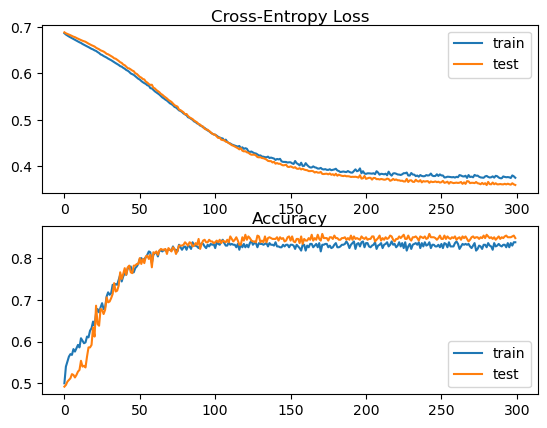

In [3]:
# example of a learning rate schedule
from sklearn.datasets import make_circles
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.callbacks import ReduceLROnPlateau
from matplotlib import pyplot
# generate dataset
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Input(shape=(2,)))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile model
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
# define learning rate schedule
rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_delta=1E-7, verbose=1)
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=300, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss learning curves
pyplot.subplot(211)
pyplot.title('Cross-Entropy Loss', pad=-40)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy learning curves
pyplot.subplot(212)
pyplot.title('Accuracy', pad=-40)
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

## Lesson 04: Batch Normalization

In this lesson, you will discover how to accelerate the training process of your deep learning neural network using batch normalization.

Batch normalization, or batchnorm for short, is proposed as a technique to help coordinate the update of multiple layers in the model.

The authors of the paper introducing batch normalization refer to change in the distribution of inputs during training as “*internal covariate shift*“. Batch normalization was designed to counter the internal covariate shift by scaling the output of the previous layer, specifically by standardizing the activations of each input variable per mini-batch, such as the activations of a node from the previous layer.

Keras supports Batch Normalization via a separate *BatchNormalization* layer that can be added between the hidden layers of your model. For example:

In [ ]:
model.add(BatchNormalization())

The example below demonstrates a Multilayer Perceptron model with batch normalization on a binary classification problem.

### Run this code with and without Batch Normalization

Train: 0.824, Test: 0.852


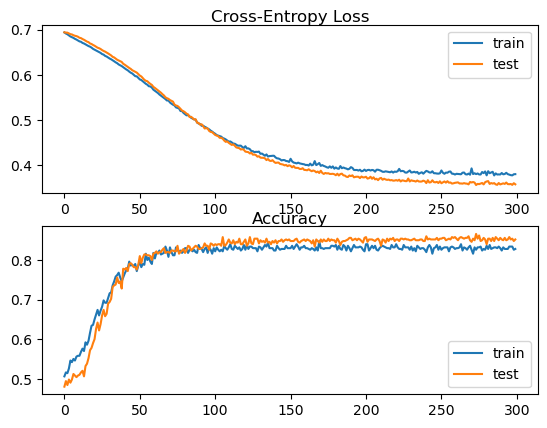

In [5]:
# example without batch normalization
from sklearn.datasets import make_circles
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.layers import BatchNormalization
from matplotlib import pyplot
# generate dataset
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Input(shape=(2,)))  # preferred way to define input shape
model.add(Dense(50, activation='relu'))
#model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))
# compile model
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=300, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss learning curves
pyplot.subplot(211)
pyplot.title('Cross-Entropy Loss', pad=-40)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy learning curves
pyplot.subplot(212)
pyplot.title('Accuracy', pad=-40)
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

Train: 0.836, Test: 0.842


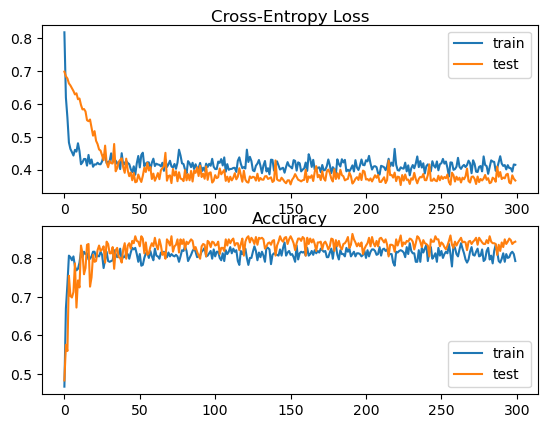

In [6]:
# example with batch normalization
from sklearn.datasets import make_circles
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.layers import BatchNormalization
from matplotlib import pyplot
# generate dataset
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Input(shape=(2,)))  # preferred way to define input shape
model.add(Dense(50, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))
# compile model
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=300, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss learning curves
pyplot.subplot(211)
pyplot.title('Cross-Entropy Loss', pad=-40)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy learning curves
pyplot.subplot(212)
pyplot.title('Accuracy', pad=-40)
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

## Lesson 05: Weight Regularization

In this lesson, you will discover how to reduce overfitting of your deep learning neural network using weight regularization.

A model with large weights is more complex than a model with smaller weights. It is a sign of a network that may be overly specialized to training data.

The learning algorithm can be updated to encourage the network toward using small weights.

One way to do this is to change the calculation of loss used in the optimization of the network to also consider the size of the weights. This is called weight regularization or weight decay.

Keras supports weight regularization via the *kernel_regularizer* argument on a layer, which can be configured to use the L1 or L2 vector norm, for example:

In [ ]:
model.add(Dense(500, input_dim=2, activation='relu', kernel_regularizer=l2(0.01)))

The example below demonstrates a Multilayer Perceptron model with weight decay on a binary classification problem.

### run with and without weight regularization

Train: 1.000, Test: 0.786


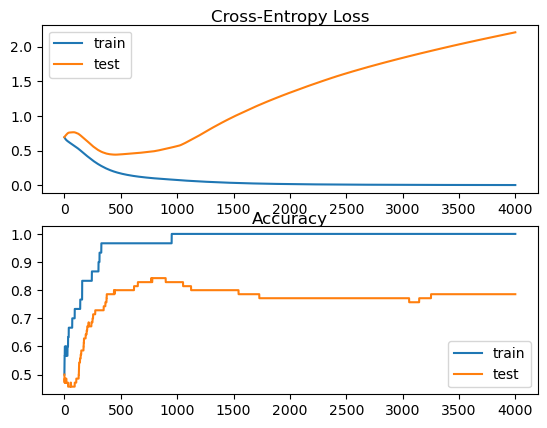

In [7]:
# example without weight decay
from sklearn.datasets import make_circles
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2
from matplotlib import pyplot
# generate dataset
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Input(shape=(2,)))  # preferred way to define input shape
model.add(Dense(500, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss learning curves
pyplot.subplot(211)
pyplot.title('Cross-Entropy Loss', pad=-40)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy learning curves
pyplot.subplot(212)
pyplot.title('Accuracy', pad=-40)
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

Train: 0.967, Test: 0.800


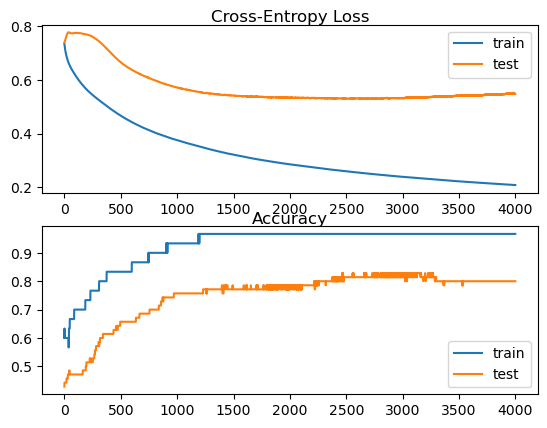

In [8]:
# example with weight decay
from sklearn.datasets import make_circles
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2
from matplotlib import pyplot
# generate dataset
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Input(shape=(2,)))  # preferred way to define input shape
model.add(Dense(500, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(1, activation='sigmoid'))
# compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss learning curves
pyplot.subplot(211)
pyplot.title('Cross-Entropy Loss', pad=-40)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy learning curves
pyplot.subplot(212)
pyplot.title('Accuracy', pad=-40)
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

## Lesson 06: Adding Noise

In this lesson, you will discover that adding noise to a neural network during training can improve the robustness of the network, resulting in better generalization and faster learning.

Training a neural network with a small dataset can cause the network to memorize all training examples, in turn leading to poor performance on a holdout dataset.

One approach to making the input space smoother and easier to learn is to add noise to inputs during training.

The addition of noise during the training of a neural network model has a regularization effect and, in turn, improves the robustness of the model.

Noise can be added to your model in Keras via the *GaussianNoise* layer. For example:

In [ ]:
model.add(GaussianNoise(0.1))

Noise can be added to a model at the input layer or between hidden layers.

The example below demonstrates a Multilayer Perceptron model with added noise between the hidden layers on a binary classification problem.

### run the code with and without the addition of noise

Train: 1.000, Test: 0.757


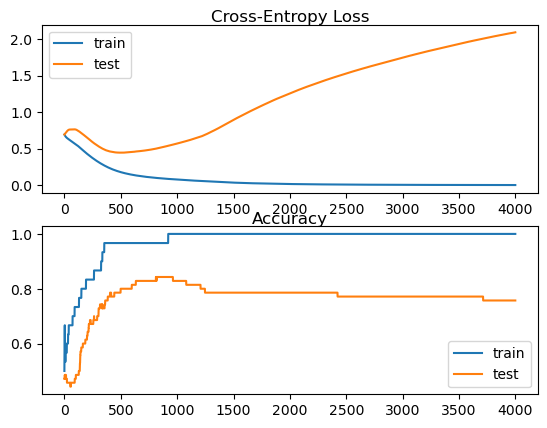

In [9]:
# example of without noise
from sklearn.datasets import make_circles
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import GaussianNoise
from matplotlib import pyplot
# generate dataset
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Input(shape=(2,)))  # preferred way to define input shape
model.add(Dense(500, activation='relu'))
#model.add(GaussianNoise(0.1))
model.add(Dense(1, activation='sigmoid'))
# compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss learning curves
pyplot.subplot(211)
pyplot.title('Cross-Entropy Loss', pad=-40)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy learning curves
pyplot.subplot(212)
pyplot.title('Accuracy', pad=-40)
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

Train: 1.000, Test: 0.814


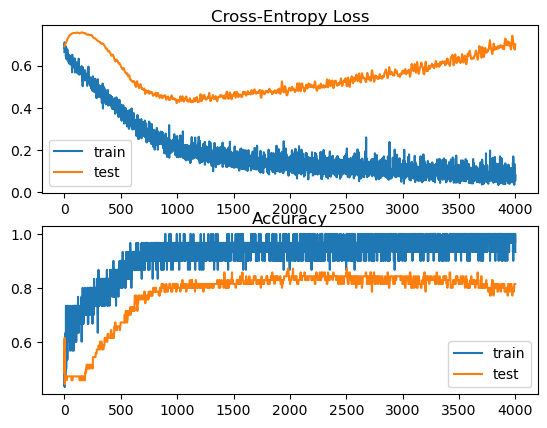

In [10]:
# example of adding noise
from sklearn.datasets import make_circles
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import GaussianNoise
from matplotlib import pyplot
# generate dataset
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Input(shape=(2,)))  # preferred way to define input shape
model.add(Dense(500, activation='relu'))
model.add(GaussianNoise(0.1))
model.add(Dense(1, activation='sigmoid'))
# compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss learning curves
pyplot.subplot(211)
pyplot.title('Cross-Entropy Loss', pad=-40)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy learning curves
pyplot.subplot(212)
pyplot.title('Accuracy', pad=-40)
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

## Lesson 07: Early Stopping

In this lesson, you will discover that stopping the training of a neural network early before it has overfit the training dataset can reduce overfitting and improve the generalization of deep neural networks.

A major challenge in training neural networks is how long to train them.

Too little training will mean that the model will underfit the train and the test sets. Too much training will mean that the model will overfit the training dataset and have poor performance on the test set.

A compromise is to train on the training dataset but to stop training at the point when performance on a validation dataset starts to degrade. This simple, effective, and widely used approach to training neural networks is called early stopping.

Keras supports early stopping via the *EarlyStopping* callback that allows you to specify the metric to monitor during training.

In [ ]:
# patient early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)

The example below demonstrates a Multilayer Perceptron with early stopping on a binary classification problem that will stop when the validation loss has not improved for 200 training epochs.

### Run the code with and without early stopping

Train: 1.000, Test: 0.786


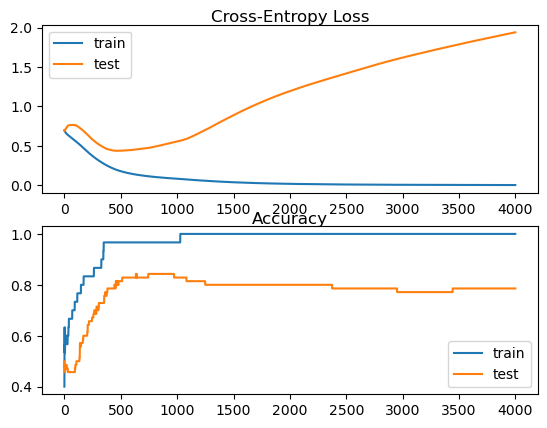

In [11]:
# example without early stopping
from sklearn.datasets import make_circles
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from matplotlib import pyplot
# generate dataset
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Input(shape=(2,)))  # preferred way to define input shape
model.add(Dense(500, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# patient early stopping
#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss learning curves
pyplot.subplot(211)
pyplot.title('Cross-Entropy Loss', pad=-40)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy learning curves
pyplot.subplot(212)
pyplot.title('Accuracy', pad=-40)
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

D:\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 704: early stopping
Train: 0.967, Test: 0.800


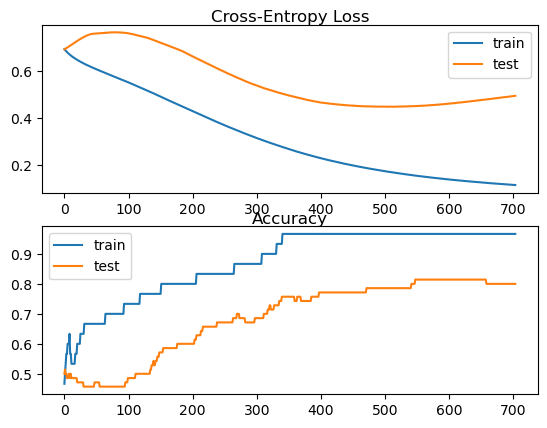

In [12]:
# example of early stopping
from sklearn.datasets import make_circles
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from matplotlib import pyplot
# generate dataset
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# patient early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0, callbacks=[es])
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss learning curves
pyplot.subplot(211)
pyplot.title('Cross-Entropy Loss', pad=-40)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy learning curves
pyplot.subplot(212)
pyplot.title('Accuracy', pad=-40)
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

## Summary

You discovered:

- A framework that you can use to systematically diagnose and improve the performance of your deep learning model.
- Batch size can be used to control the precision of the estimated error and the speed of learning during training.
- Learning rate schedule can be used to fine tune the model weights during training.
- Batch normalization can be used to dramatically accelerate the training process of neural network models.
- Weight regularization will penalize models based on the size of the weights and reduce overfitting.
- Adding noise will make the model more robust to differences in input and reduce overfitting
- Early stopping will halt the training process at the right time and reduce overfitting.